# Objective: Credit Card Fraud Detection for an E-Commerce Bookstore

In this project, we aim to build a **fraud detection system** for our e-commerce bookstore, which has sold thousands of books over the years. Fraudulent credit card transactions can cause significant financial losses, and traditional rule-based fraud detection methods have proven insufficient.

We will use a publicly available dataset of anonymized real credit card transactions to detect fraud. This dataset is highly imbalanced, with fraudulent transactions making up a very small portion (~0.1%) of the total. 

### Key Challenges:
- **Imbalanced Dataset**: Fraudulent transactions are rare, making up only a small percentage of the data.
- **Pattern Recognition**: The system must learn to distinguish legitimate users from fraudsters using subtle patterns in the data.
- **Advanced Techniques**: We'll employ advanced techniques such as sampling and specific performance metrics to handle this imbalance, as high accuracy alone is not sufficient.

The ultimate goal is to build a model that minimizes false positives and negatives, protecting our users from fraud while ensuring a smooth transaction process for legitimate buyers.


In [2]:
#import libraries
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [3]:
df = pd.read_csv("creditcard.csv")

## Data Exploration

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Pre-processing

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [12]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [14]:
df = df.drop(['Amount'],axis=1)

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [16]:
df = df.drop(['Time'],axis=1)

In [17]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [18]:
X = df.iloc[:, df.columns != 'Class']

In [19]:
y = df.iloc[:,df.columns == 'Class']

In [20]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [21]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [24]:
X_train.shape

(199364, 29)

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
X_train.shape

(199364, 29)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Dropout

In [36]:
model = Sequential([
    Input(shape=(29,)),  # Define the input shape
    Dense(units=16, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')

])

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 24)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,917 (7.49 KB)

 Trainable params: 1,917 (7.49 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [39]:
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9822 - loss: 0.0419
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9993 - loss: 0.0042
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9995 - loss: 0.0033
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9995 - loss: 0.0032


In [40]:
score = model.evaluate(X_test,y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9993 - loss: 0.0037


In [41]:
score

[0.00402607349678874, 0.9993211627006531]

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step


In [44]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [45]:
cnf_matrix

array([[85279,    17],
       [   41,   106]], dtype=int64)

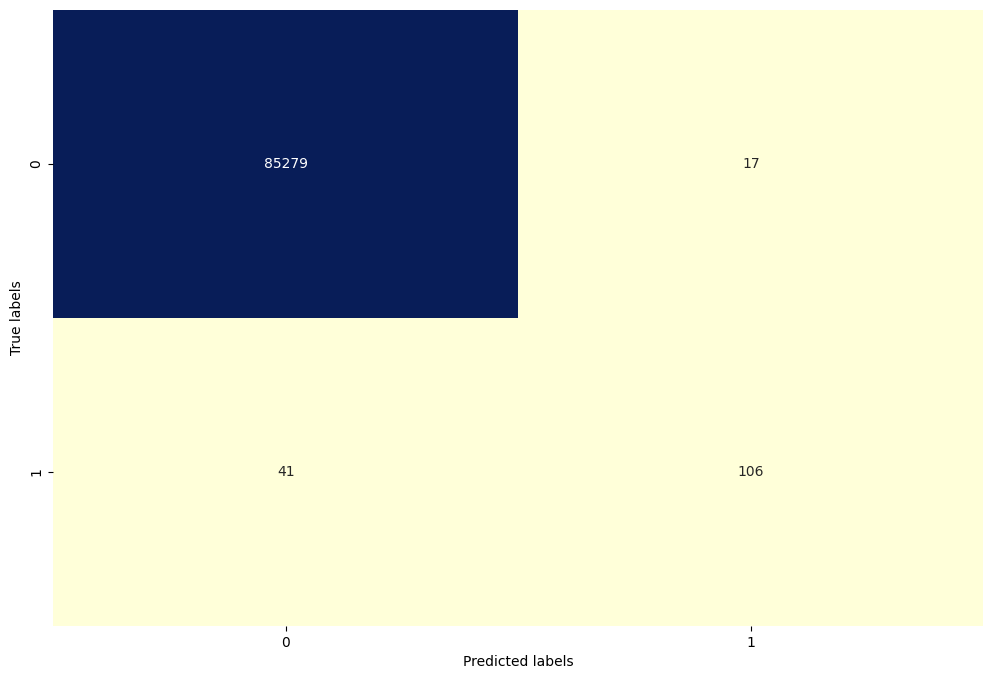

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()

In [52]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 9s 980us/step


In [54]:
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

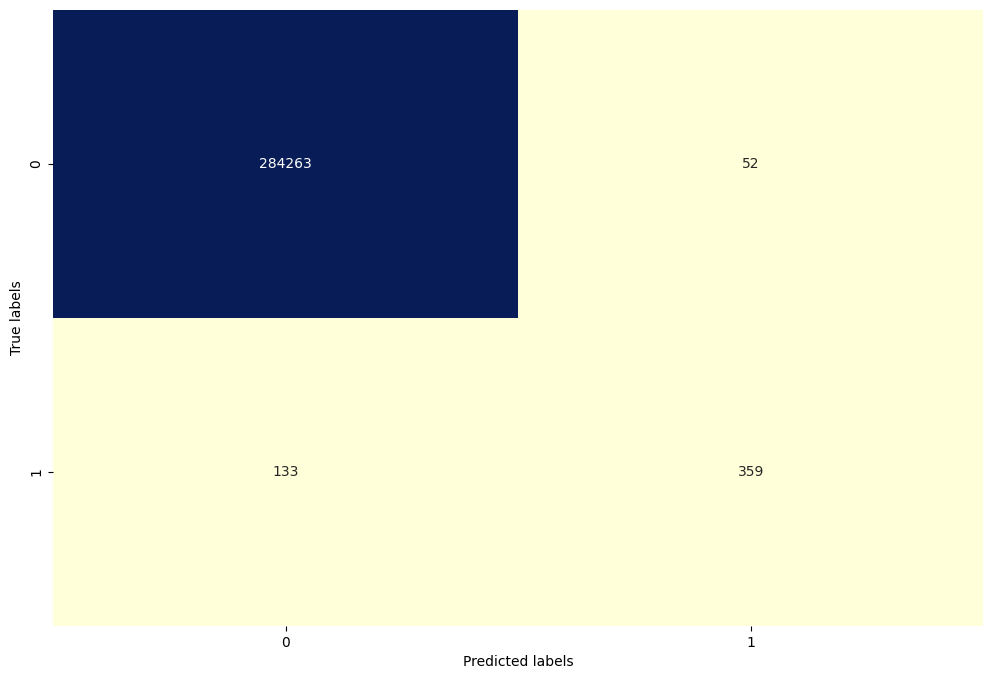

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()

## Random Forest

In [56]:
data = pd.read_csv('creditcard.csv')

In [57]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [58]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [59]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [61]:
X_train.shape

(199364, 29)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
random_forest = RandomForestClassifier(n_estimators=100)

In [64]:
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [65]:
y_pred = random_forest.predict(X_test)

In [66]:
random_forest.score(X_test, y_test)

0.9995435553526912

In [67]:
cnf_matrix = confusion_matrix(y_test,y_pred)

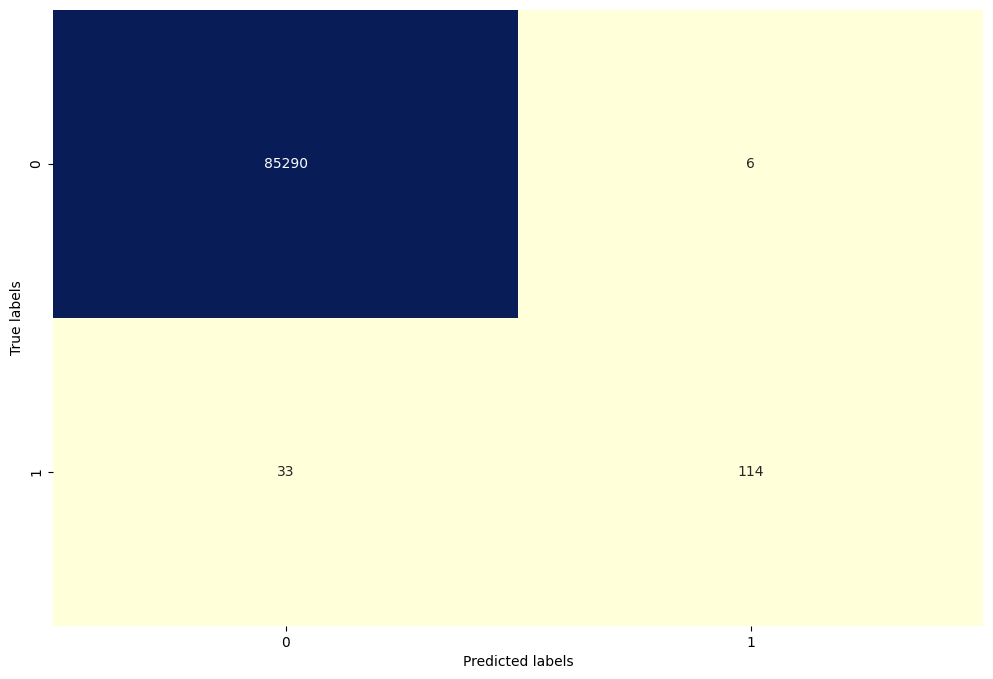

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()

In [70]:
y_pred = random_forest.predict(X)

In [71]:
cnf_matrix = confusion_matrix(y,y_pred.round())

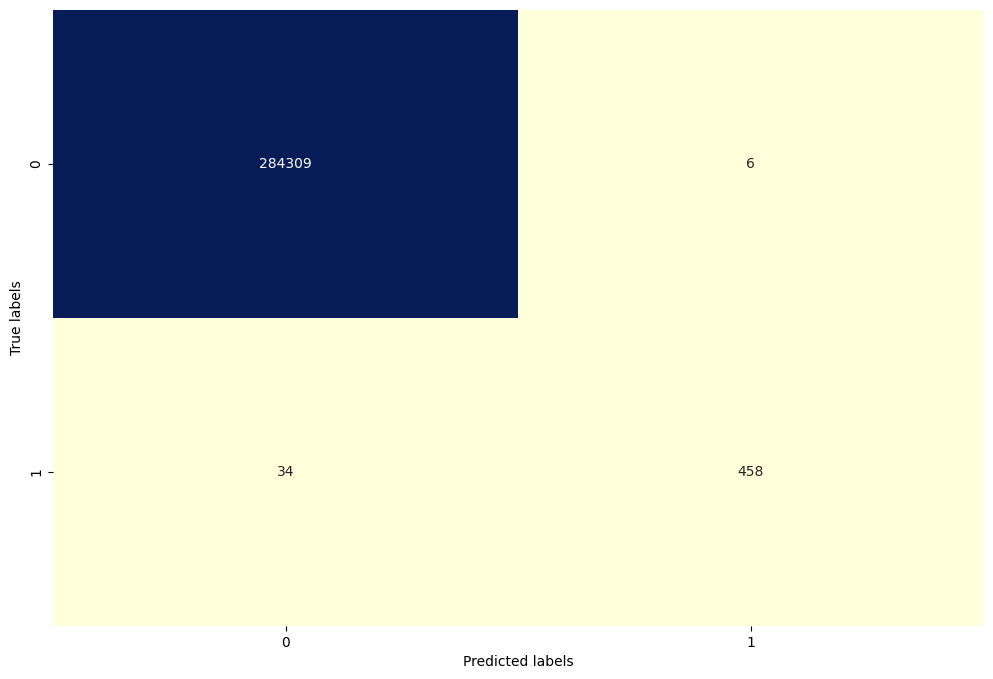

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()

## Decision Tree

In [73]:
data = pd.read_csv('creditcard.csv')

In [74]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [75]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [76]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

## Decision Trees

In [78]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [79]:
decision_tree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [80]:
y_pred = decision_tree.predict(X_test)

In [81]:
decision_tree.score(X_test,y_test)

0.9992392589211521

In [83]:
cnf_matrix = confusion_matrix(y_test,y_pred)

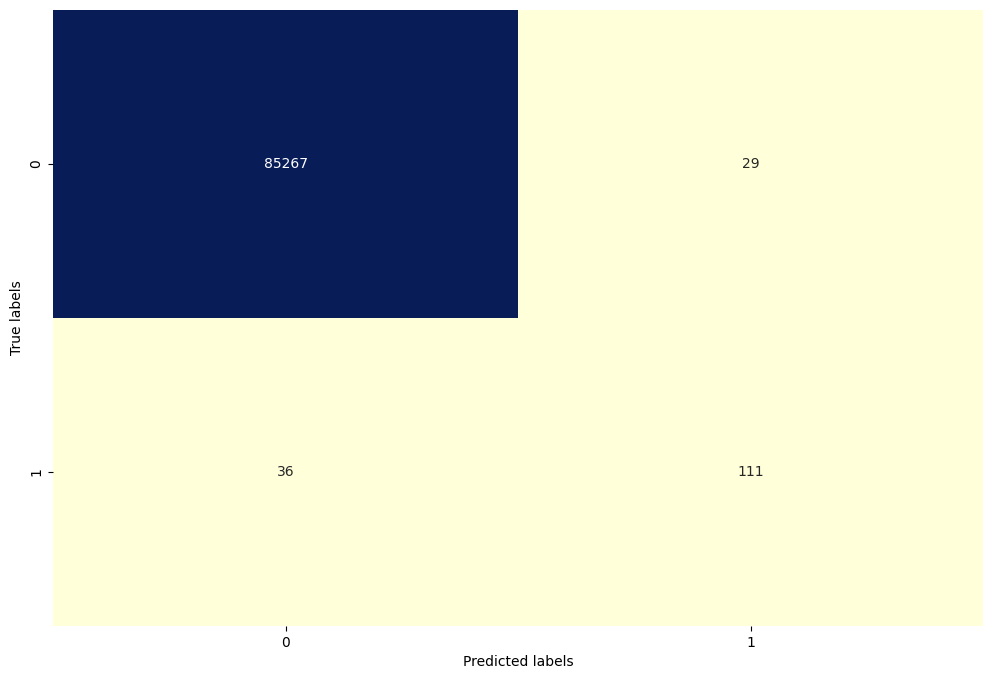

In [84]:
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()

In [85]:
y_pred = decision_tree.predict(X)

In [86]:
y_expected = pd.DataFrame(y)

In [88]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())

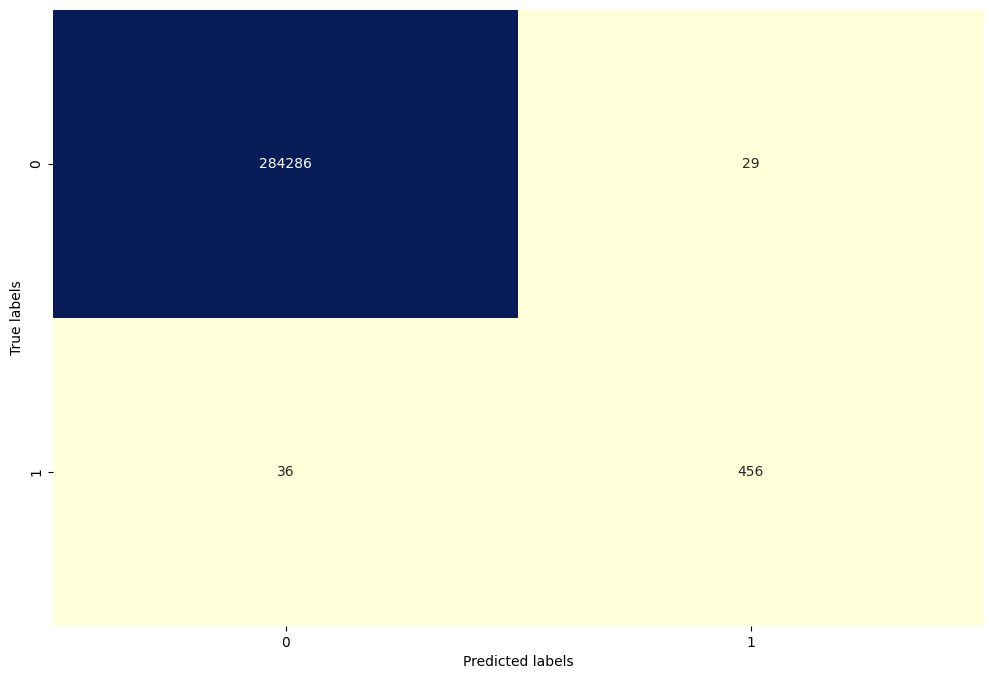

In [89]:
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()

## Undersampling

In [90]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [91]:
normal_indices = data[data.Class == 0].index

In [92]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [93]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [94]:
under_sample_data = data.iloc[under_sample_indices,:]

In [95]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [97]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [98]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 24)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,753 (22.48 KB)

 Trainable params: 1,917 (7.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,836 (14.99 KB)

In [99]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8799 - loss: 0.8231
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9265 - loss: 0.2649
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9249 - loss: 0.1912
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 0.1368
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9443 - loss: 0.1416


In [100]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


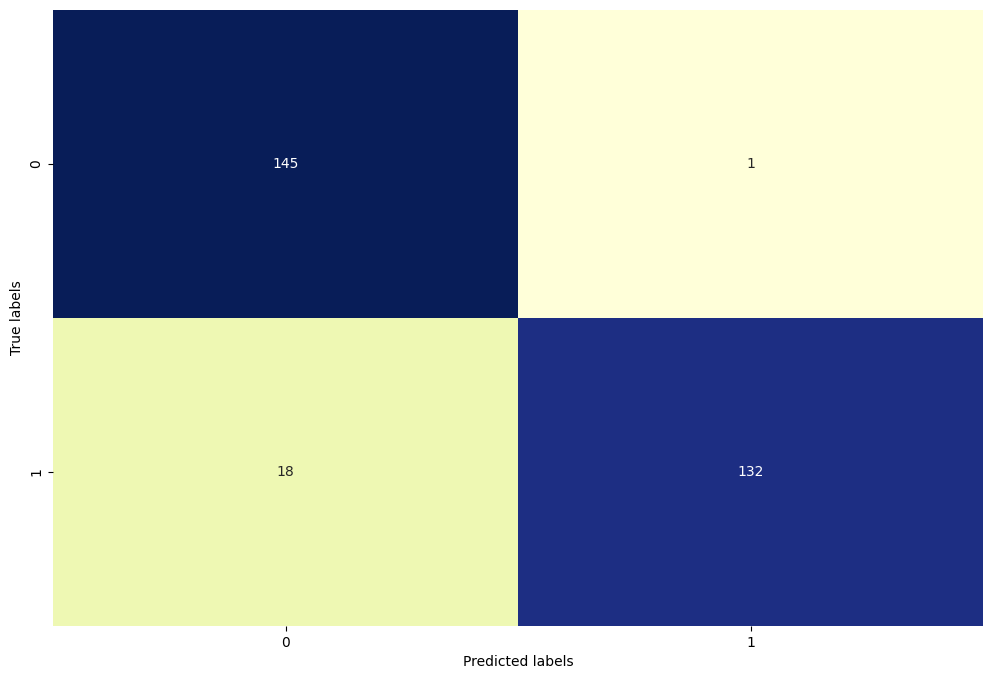

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()

In [103]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Collecting imbalanced-learn
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------------------------------ --------- 194.6/258.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.2 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
from imblearn.over_sampling import SMOTE

In [106]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [107]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [109]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.9819 - loss: 0.0503
Epoch 2/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9956 - loss: 0.0151
Epoch 3/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9969 - loss: 0.0115
Epoch 4/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9975 - loss: 0.0097
Epoch 5/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.9978 - loss: 0.0087


In [110]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


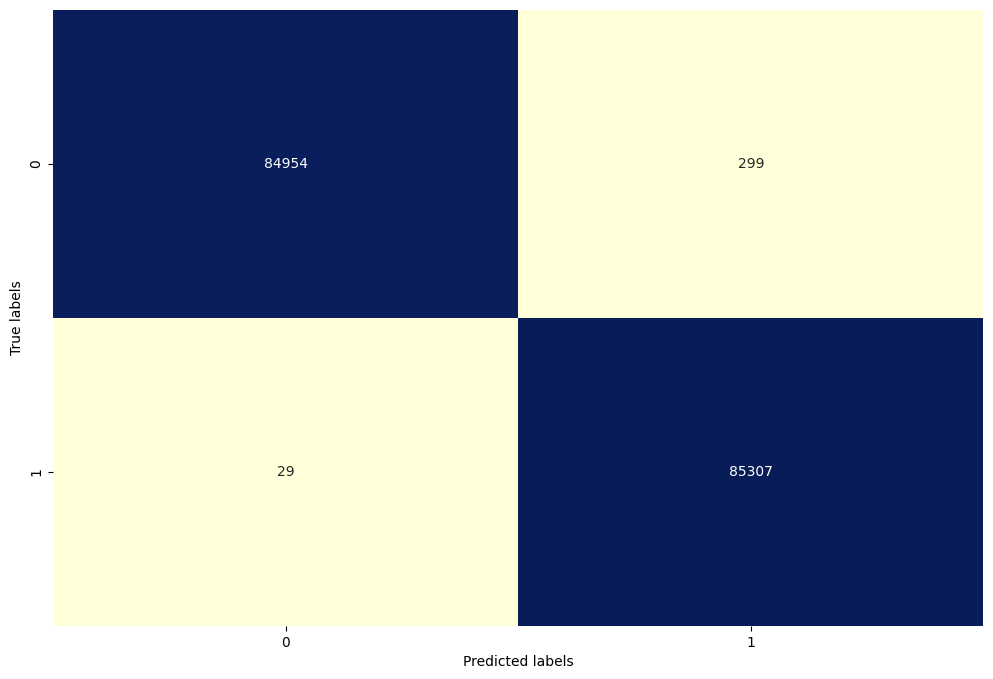

In [111]:
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()

In [112]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


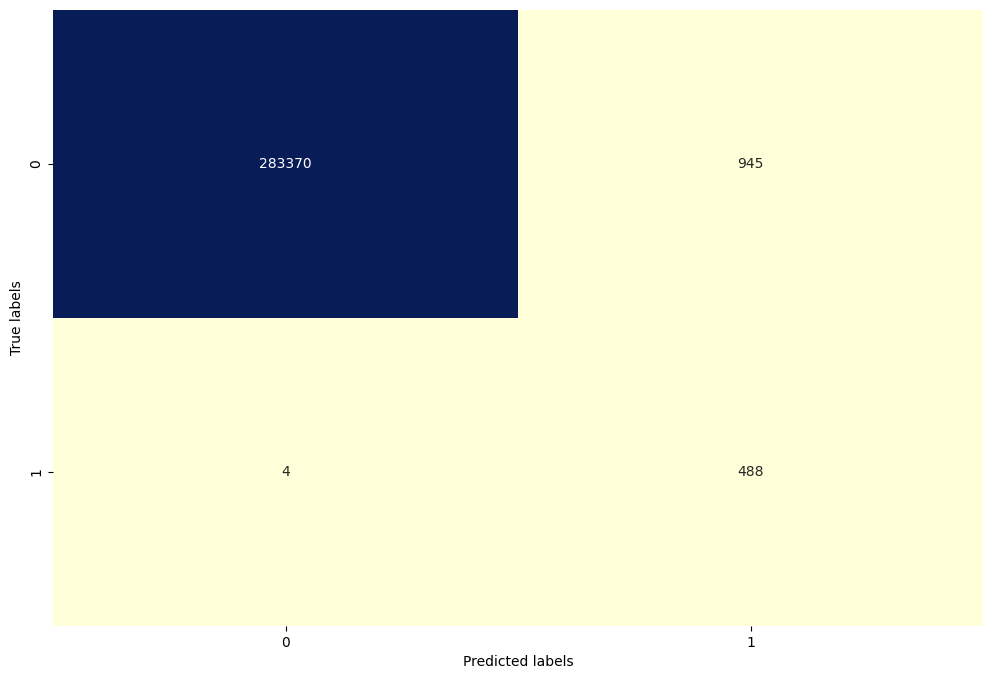

In [113]:
plt.figure(figsize=(12, 8))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=[0.5, 1.5], labels=[0, 1])
plt.yticks(ticks=[0.5, 1.5], labels=[0, 1])

plt.show()